In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Exact Method

The Exact Method involves doing what we just did but with maths alone. You specify functional forms for the prior and likelihood and derive the resulting posterior formula. It rarely works out well for anything but the simplest problems either because the functions are difficult or the normalizer (usually an intergral of some sort) cannot be simplified. Because the Exact Method is so rarely applicable, I never think to use it. As Data Scientists, we have to be competent in so many different fields (visualization? statistics? machine learning?) that I find I need to lower the cognitive load by keeping to as many "one size fits most" approaches as possible in each field.

However, a discussion of the Exact Method provides a natural entry into discussing the Monte Carlo Method because the Monte Carlo method is, essentially, a computational way of doing the Exact Method...what we get are approximations but we lose the integrals and we can handle a much wider range of problems.

For the Bernoulli case, we picked the Binomial Distribution as a function of $\theta$ (canonically called "p"):

$$X \sim B(140; 250, p) = \binom{250}{140}p^{140}(1-p)^{110}$$

which gives us our unnormalized likelihood. When we pick a form for our likelihood, it turns out that we can make the math simpler by picking a prior that has a form for which our likelihood has an "affinity". Such a distribution is called a *conjugate* distribution. As it turns out, the conjugate distribution for the binomial distribution is the beta distribution. An additional advantage to using a conjugate prior is that the *posterior* will have the same form as the conjugate prior which means that the posterior can be used a prior for later investigations.

| Distribution | Conjugate |
|:------------:|:---------:|
| Normal       | Normal    |
| Binomial     | Beta      |
| Multinomial  | Dirichlet |

One final advantage of conjugate priors is that they can count as pseudo-observations. For example, the Beta Distribution is parameterized as follows:

$$X \sim  Beta(\alpha, \beta)$$

where $X$ is in the range $[0, 1]$ and $\alpha$ can be interpreted as the number of pseudo-successes and $\beta$ can be interpreted as the number of pseudo-failures. The following charts show how one might use the Beta Distribution as a prior for some parameter like $\theta$.

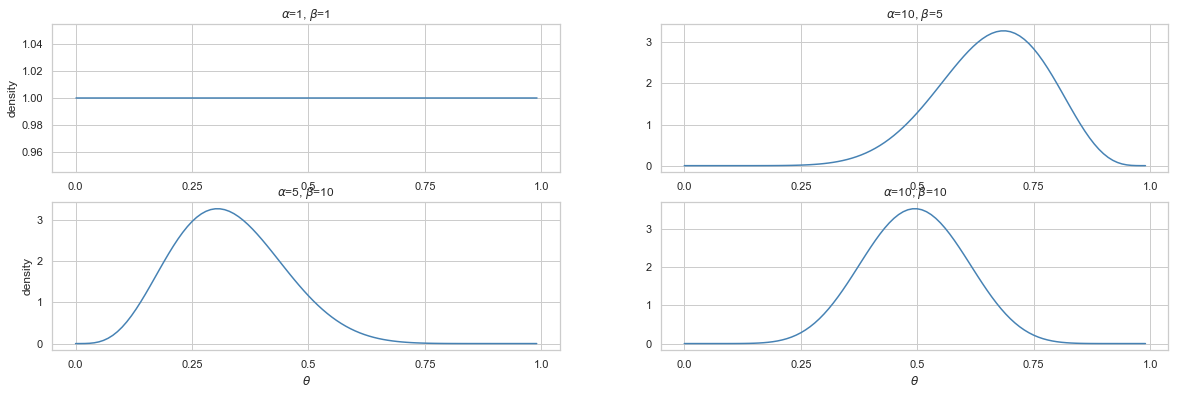

In [3]:
fig, axes = plt.subplots( nrows = 2, ncols = 2, figsize=( 20, 6))

xs = np.linspace( 0, 1, 100)

axes[ 0][ 0].plot([stats.beta.pdf( x, 1, 1) for x in xs], color="steelblue")
axes[ 0][ 0].set_title( r"$\alpha$=1, $\beta$=1")
axes[ 0][ 0].set_ylabel( "density")
axes[ 0][ 0].set_xticks([0, 25, 50, 75, 100])
axes[ 0][ 0].set_xticklabels([0.0, 0.25, 0.5, 0.75, 1.0])

axes[ 0][ 1].plot([stats.beta.pdf( x, 10, 5) for x in xs], color="steelblue")
axes[ 0][ 1].set_title( r"$\alpha$=10, $\beta$=5")
axes[ 0][ 1].set_xticks([0, 25, 50, 75, 100])
axes[ 0][ 1].set_xticklabels([0.0, 0.25, 0.5, 0.75, 1.0])

axes[ 1][ 0].plot([stats.beta.pdf( x, 5, 10) for x in xs], color="steelblue")
axes[ 1][ 0].set_title( r"$\alpha$=5, $\beta$=10")
axes[ 1][ 0].set_xticks([0, 25, 50, 75, 100])
axes[ 1][ 0].set_xticklabels([0.0, 0.25, 0.5, 0.75, 1.0])
axes[ 1][ 0].set_ylabel( "density")
axes[ 1][ 0].set_xlabel( r"$\theta$")

axes[ 1][ 1].plot([stats.beta.pdf( x, 10, 10) for x in xs], color="steelblue")
axes[ 1][ 1].set_title( r"$\alpha$=10, $\beta$=10")
axes[ 1][ 1].set_xticks([0, 25, 50, 75, 100])
axes[ 1][ 1].set_xticklabels([0.0, 0.25, 0.5, 0.75, 1.0])
axes[ 1][ 1].set_xlabel( r"$\theta$")

plt.show()
plt.close()

In the first panel, we can see that pseudo-counts of 1 success and 1 failure leads to a uniform distribution but in the fourth panel, pseudo-counts of 1 success and 1 failure leads to a peaked distribution around $\theta=0.5$. The panels on the off diagonals show what happens when the counts are skewed either towards failures or successes.

The nice thing about the Exact Method when it does work out is that we have a formula for our posterior distribution. Starting with something like:

$P(\theta|\alpha=10, \beta=10, a=140, b=110) \propto \binom{250}{140}\theta^{140}(1-\theta)^{110} * Beta( 140, 110)$

after a lot of maths, we end up with the following posterior:

$Beta( a + \alpha, b + \beta)$

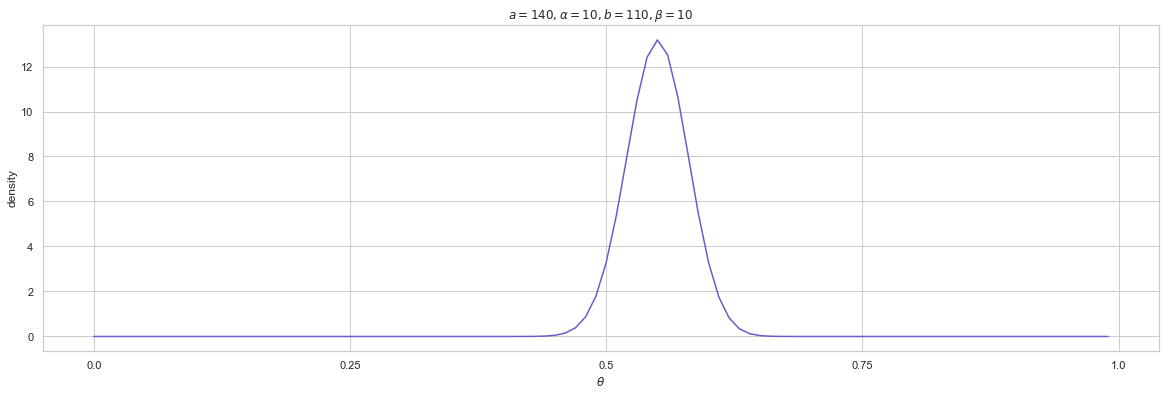

In [4]:
figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(1, 1, 1)

axes.plot([stats.beta.pdf( x, 140+10, 110+10) for x in xs], color="slateblue")
axes.set_title( r"$a=140, \alpha=10, b=110, \beta=10$")
axes.set_ylabel( "density")
axes.set_xticks([0, 25, 50, 75, 100])
axes.set_xticklabels([0.0, 0.25, 0.5, 0.75, 1.0])
axes.set_xlabel( r"$\theta$")

plt.show()
plt.close()

which looks a bit familiar, no? The main difference is that we're now dealing with a PDF and not a PMF (density) but the overall shape is the same as the one we derived using the Grid Method (which is good...it would be bad if they were *not* the same general shape).